In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from sklearn.metrics import r2_score
np.random.seed = 42

# MONOVARIÁVEL
$x_k = A\, x_{k-1} + B\, u_k$ 


- A: Matriz de transição de estado $\Rightarrow$ como as variáveis interagem entre si 
- B: Matriz de controle $\Rightarrow$ Mapea os inputs de controle, ou seja, como a variável 2 pode ser obtida a partir da variável 1....
- H: Matriz de observação $\Rightarrow$ Variávei que são **medidas** são inseridas com 1

$P_k = A\,P_{k-1}\cdot A^T+ Q$

- Q: Covariância do ruído de processo $\Rightarrow$ Incerteza no sistema, quanto menor o valor de Q (variância do processo), menos o filtro de Kalman confia no modelo e mais ele confia nas medições.
- R: Covariância do ruído de medição $\Rightarrow$ Incerteza nos sensores (variáveis), constante que deve representar a incerteza do sensor em grandeza absoluta 
- P: Covariância do erro inicial  $\Rightarrow$ Covariancia inicial (estimativa), se adapta com o sistema. É a incerteza das previsões de seu modelo 
- x: Estado inicial

OBS: Se temos $x_k = [x_1, x_2]$, e medimos diretamente ambos ($z_k = [x_1, x_2]$), $H$ é a matriz identidade.

$H =
\left[
\begin{array}{cc}
1 & 0 \\
0 & 1 
\end{array}
\right]
$

In [45]:
class KalmanFilter:
    def __init__(self, A, B, H, Q, R, P, x):
        self.A = A
        self.B = B
        self.H = H
        self.Q = Q
        self.R = R
        self.P = P
        self.x = x

    def predict(self, u=0):
        self.x = np.dot(self.A, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q

    def update(self, z):
        y = z - np.dot(self.H, self.x)  # Inovação
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R  # Covariância da inovação
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  # Ganho de Kalman
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.A.shape[0])  # Matriz identidade
        self.P = np.dot(I - np.dot(K, self.H), self.P)

    def predictFuture(self, steps, U=None):
        original_x = self.x.copy()  # Salva o estado atual
        original_P = self.P.copy()  # Salva a covariância atual

        predictions = []
        u_index = 0

        for step in range(steps):
            if U is not None and u_index < len(U):
                u = np.array(U[u_index]).reshape(-1, 1)  # Transforma em vetor coluna
                u_index += 1
            else:
                u = np.zeros((self.B.shape[1], 1))  # Entrada padrão: zero

            self.predict(u)
            predictions.append(self.x.copy())  # Salva o estado predito

        self.x = original_x  # Restaura o estado original
        self.P = original_P  # Restaura a covariância original
        return predictions


    def getState(self):
        return self.x

# DADOS RUIDOSOS
- Simula medições ruidosas e verifica se o filtro consegue chegar ao valor real

In [46]:
A = np.array([[1]])     # Estado constante
B = np.array([[0]])     # Sem controle
H = np.array([[1]])     # Observação direta
Q = np.array([[1e-3]])  # Variância do processo
R = np.array([[0.1]])   # Variância da medição
P = np.array([[1]])     # Covariância inicial
x = np.array([[0]])     # Estado inicial


kalman = KalmanFilter(A, B, H, Q, R, P, x)
kalman

- Filtro obedece a $\Rightarrow G = \frac{X}{U} = \frac{\text{saída do sistema}}{\text{entrada do sistema}}$, a relação entre elas é $G$, que pega os dados brutos $u$ e transforma em dados filtrados $x$

In [47]:
def noise(x, mag=0.3):
    return x + np.random.uniform(-mag, mag)

noise(1)

0.7300952564171415

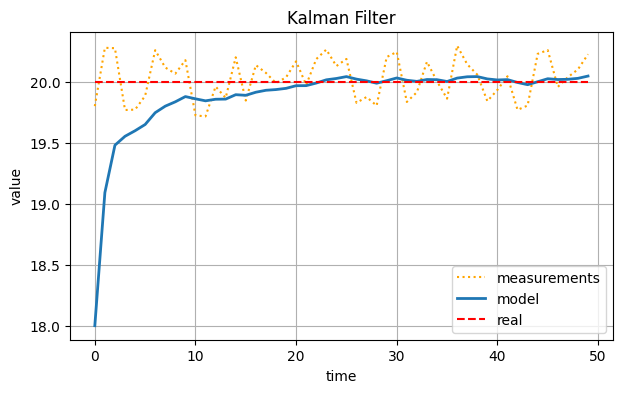

In [48]:
realValue = 20
rData = [realValue for i in range(50)]          # valores reais (setpoint)
uData = [noise(realValue) for i in range(50)]   # valores de entrada (brutos)
xData = []                                      # valores de saída (filtrados)

for u in uData:
    U = np.array([[u]])
    kalman.predict()
    kalman.update(U)
    result = kalman.getState()[0, 0]
    xData.append(result)


plt.figure(figsize=(7, 4))
plt.plot(uData, label='measurements', color='orange', linestyle='dotted')
plt.plot(xData, label='model', linewidth=2)
plt.plot(rData, label="real", linestyle="--", color='red')
plt.legend(), plt.xlabel('time'), plt.ylabel('value')
plt.title(f'Kalman Filter')
plt.grid()

# PREVISÃO DE VALORES FUTUROS

[array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.97074131]]), array([[19.9707

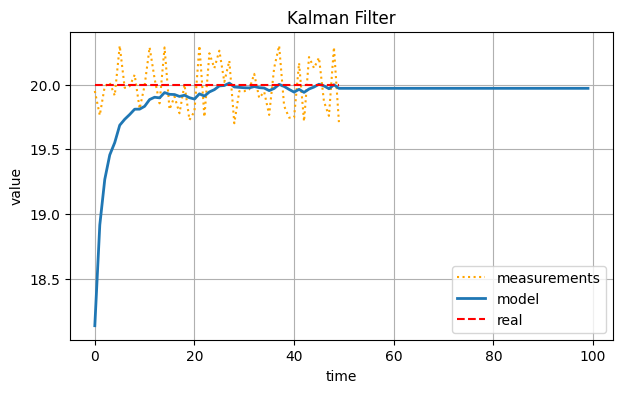

In [49]:
kalman = KalmanFilter(A, B, H, Q, R, P, x)
realValue = 20

rData = [realValue for i in range(50)]
uData = [noise(realValue) for i in range(50)]
xData = []

for u in uData:
    U = np.array([[u]])
    kalman.predict()
    kalman.update(U)
    result = kalman.getState()[0, 0]
    xData.append(result)

u = uData[-1]
U = np.array([[u]])
predictions = kalman.predictFuture(50, U)
print(predictions)

for prediction in predictions:
    xData.append(prediction[0][0])


plt.figure(figsize=(7, 4))
plt.plot(uData, label='measurements', color='orange', linestyle='dotted')
plt.plot(xData, label='model', linewidth=2)
plt.plot(rData, label="real", linestyle="--", color='red')
plt.legend(), plt.xlabel('time'), plt.ylabel('value')
plt.title('Kalman Filter')
plt.grid()

# DADOS REAIS

In [50]:
df = pd.read_csv('../Analysis/DataBase.csv')
df.head()

,t,ax,ay,az,wx,wy,wz,dt,vx,vy,vz,x,y,z
0,0.002,-2.191144,-2.517166,5.100793,9548,14884,-5324,0.000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000
1,0.034,-2.278562,-0.597258,5.655839,5132,6476,-13632,0.032,-0.072914,-0.019112,0.180987,-0.002333,-0.000612,0.005792
2,0.126,-0.731080,-5.636379,1.973197,7400,3380,-9772,0.092,-0.140173,-0.537659,0.362521,-0.015229,-0.050076,0.039144
3,0.217,2.991978,-5.729187,1.295406,11040,6228,-15132,0.091,0.132097,-1.059015,0.480403,-0.003208,-0.146447,0.082860
4,0.309,1.047222,-0.721500,0.287103,10296,8776,-18032,0.092,0.228441,-1.125393,0.506816,0.017808,-0.249983,0.129487


In [51]:
A = np.array([[1]])     # Estado constante
B = np.array([[0]])     # Sem controle
H = np.array([[1]])     # Observação direta
Q = np.array([[1e-2]])  # Variância do processo
R = np.array([[0.1]])   # Variância da medição
P = np.array([[1]])     # Covariância inicial
x = np.array([[0]])     # Estado inicial


kalman = KalmanFilter(A, B, H, Q, R, P, x)
kalman

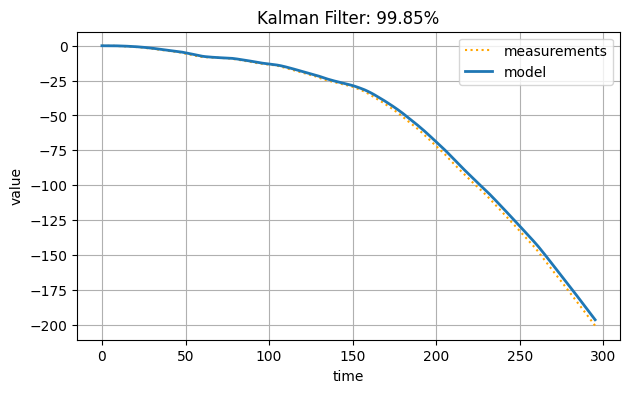

In [52]:
uData = df.x.values
xData = []

for u in uData:
    U = np.array([[u]])
    kalman.predict()
    kalman.update(U)
    result = kalman.getState()[0, 0]
    xData.append(result)

score = r2_score(uData, xData)
plt.figure(figsize=(7, 4))
plt.plot(uData, label='measurements', color='orange', linestyle='dotted')
plt.plot(xData, label='model', linewidth=2)
plt.legend(), plt.xlabel('time'), plt.ylabel('value')
plt.title(f'Kalman Filter: {score*100:.2f}%')
plt.grid()

# MULTIVARIÁVEL
- os valores de velocidade e posição foram calculados com integração, são os valores reais, vamos tentar criar um modelo para simplificar esses dados usando $a = \text{constante}$, filtrar esses dados e prever novos valores 
- ax $\Rightarrow$ aceleração no eixo x
- vx $\Rightarrow$ velocidade no eixo x
- x  $\Rightarrow$ posição no eixo x

In [53]:
df.head()

,t,ax,ay,az,wx,wy,wz,dt,vx,vy,vz,x,y,z
0,0.002,-2.191144,-2.517166,5.100793,9548,14884,-5324,0.000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000
1,0.034,-2.278562,-0.597258,5.655839,5132,6476,-13632,0.032,-0.072914,-0.019112,0.180987,-0.002333,-0.000612,0.005792
2,0.126,-0.731080,-5.636379,1.973197,7400,3380,-9772,0.092,-0.140173,-0.537659,0.362521,-0.015229,-0.050076,0.039144
3,0.217,2.991978,-5.729187,1.295406,11040,6228,-15132,0.091,0.132097,-1.059015,0.480403,-0.003208,-0.146447,0.082860
4,0.309,1.047222,-0.721500,0.287103,10296,8776,-18032,0.092,0.228441,-1.125393,0.506816,0.017808,-0.249983,0.129487


$X_k = A\, X_{k-1} + B\, U_k$ 

Queremos encontrar a posição e velocidade a partir da aceleração, então $X = [x, v, a]$ e $U = [a_r]$


- $x = x_0 + v_0t + \frac{a_rt^2}{2}$
- $v = v_0 + a_rt$
- $a = a_r$

Como o tempo é muito curto, substituimos $t$ por $\Delta t \approx dt$

- $x = x_0 + v_0\cdot dt + \frac{a_r\, dt^2}{2}$
- $v = v_0 + a_r\cdot dt $
- $a = a_r$

Colocando na forma padrão

- $x = (1) \cdot x_0 + (dt) \cdot v_0 + (0)\cdot a + (0.5 dt^2) \cdot a_r$
- $v = (0)\cdot x_0 + (1) \cdot v_0 + (0)\cdot a + (dt)\cdot a_r $
- $a = (0) \cdot x_0 + (0) \cdot v_0 + (0) \cdot a + (1)\cdot a_r $

As matrizes se tornam:

- $
\left[
\begin{array}{c}
    x\\
    v\\
    a
\end{array}
\right]
=
\left[
\begin{array}{cc}
    1 & dt & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 0
\end{array}
\right]
\cdot
\left[
\begin{array}{c}
    x_0\\
    v_0\\
    a_0
\end{array}
\right] + \left[
\begin{array}{c}
    0.5 dt^2\\
    dt\\
    1
\end{array}
\right] \cdot [a_r]
$

In [54]:
n  = 3
dt = df.dt.mean()
dt

0.09164189189189184

In [ ]:
A = np.array([
    [1, dt, 0],     # Posição depende da velocidade
    [0, 1, 0],      # Velocidade permanece constante
    [0, 0, 0],
])

B = np.array([
    [0.5*dt**2],  # Contribuição da aceleração para a posição
    [dt],         # Contribuição da aceleração para a velocidade
    [0]           # Contribuição da aceleração para a aceleração    
])

H = np.array([
    [1, 0, 0],     # queremos posição
    [0, 1, 0],     # queremos velocidade
    [0, 0, 1]      # queremos aceleração
])

Q = np.array([
    [0.001, 0, 0],  # variância na posição (velocidade de reação a mudanças)
    [0, 0.001, 0],  # variância na posição (velocidade de reação a mudanças)
    [0, 0, 0.1]
])

R = np.array([
    [0.1, 0, 0],  # Ruído na posição     (quanto menor, o kalman confia nos dados)
    [0, 0.1, 0],  # Ruído na velocidade  (quanto menor, o kalman confia nos dados)
    [0, 0, 0.1]
])

x = np.array([
    [0],        # Posição inicial
    [0],        # Velocidade inicial
    [0]
])

P = np.eye(n) # Covariância inicial do estado


kalman = KalmanFilter(A, B, H, Q, R, P, x)
display(sp.Matrix(A))
display(sp.Matrix(B))
display(sp.Matrix(H))
display(sp.Matrix(Q))
display(sp.Matrix(R))
display(sp.Matrix(P))
display(sp.Matrix(x))

Matrix([
[1.0, 0.0916418918918918, 0],
[  0,                1.0, 0],
[  0,                  0, 0]])

Matrix([
[0.0041991181747626],
[0.0916418918918918],
[                 0]])

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

Matrix([
[0.001,     0,     0],
[    0, 0.001,     0],
[    0,     0, 0.001]])

Matrix([
[0.1,   0,   0],
[  0, 0.1,   0],
[  0,   0, 0.1]])

Matrix([
[1.0,   0,   0],
[  0, 1.0,   0],
[  0,   0, 1.0]])

Matrix([
[0],
[0],
[0]])

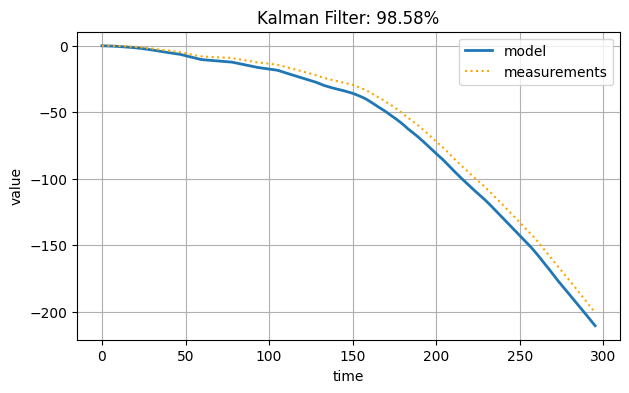

In [56]:
uData = df.ax.values
xData = []
v = 0
x = 0

for a in uData:
    a = noise(a)
    v = v + a*dt
    x = x + v*dt + (a*0.5*dt**2)

    U = np.array([[a]])
    X = np.array([[x], [v], [a]])

    kalman.predict(U)
    kalman.update(X)

    result = kalman.getState()[0, 0] # pegando x
    xData.append(result)


score = r2_score(df.x, xData)
plt.figure(figsize=(7, 4))
plt.plot(xData, label='model', linewidth=2)
plt.plot(df.x,  label='measurements', color='orange', linestyle='dotted')
plt.legend(), plt.xlabel('time'), plt.ylabel('value')
plt.title(f'Kalman Filter: {score*100:.2f}%')
plt.grid()

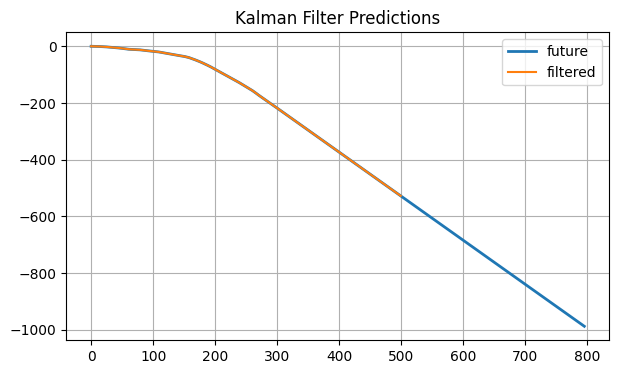

In [57]:
# Obter a última entrada de controle (aceleração)
a = uData[-1]
U = np.array([[a]])

# Previsão de x passos no futuro
future = kalman.predictFuture(500, U)

for step in future:
    position = step[0, 0]  # Posição prevista
    velocity = step[1, 0]  # Velocidade prevista
    xData.append(position)


plt.figure(figsize=(7, 4))
plt.plot(xData, linewidth=2, label='future')
plt.plot(xData[:500], label='filtered')
plt.title('Kalman Filter Predictions'), plt.legend(), plt.grid()
plt.show()
